In [1]:
suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(patchwork))
suppressMessages(library(dplyr))
suppressMessages(library(CellChat))
suppressMessages(library(foreach))

In [2]:
# future::plan("multisession", workers = 16) 

In [3]:
in_dir <- "../../results/04_spatial/10_viz_cell2location"
out_dir <- "../../results/04_spatial/23_cellchat"

if(!dir.exists(out_dir)){
    dir.create(out_dir, recursive = TRUE)
}

In [4]:
sample_list <- c('HC01', 'HC02', 'HC03', 'HC05', 
                 'SSc4994', 'SSc5380', 
               'SSc-HL01', 'SSc-HL05', 'SSc-HL06', 'SSc-HL11',
               'SSc-HL13', 'SSc-HL25', 'SSc-HL33', 'SSc-HL35')

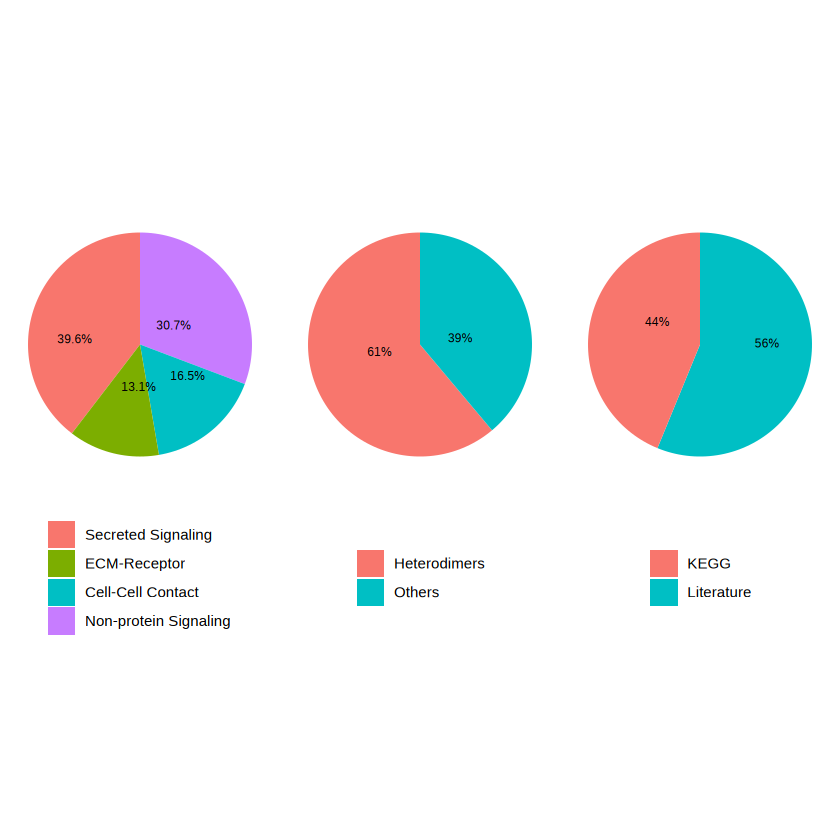

In [5]:
CellChatDB <- CellChatDB.human
showDatabaseCategory(CellChatDB)

In [6]:
# use all CellChatDB except for "Non-protein Signaling" for cell-cell communication analysis
CellChatDB.use <- subsetDB(CellChatDB)

In [7]:
length(unique(CellChatDB.use$interaction$pathway_name))

[1] 252

In [8]:
for(sample in sample_list) {
    cat(sample)
    cat('\n')

    obj <- readRDS(glue::glue("{in_dir}/{sample}.rds"))
    
    # prepare data
    data.input = Seurat::GetAssayData(obj, layer = "data", assay = "Spatial")
    
    meta = data.frame(labels = obj$pred_cell_type, 
                      samples = sample, 
                      row.names = names(Seurat::Idents(obj)))
    
    meta$labels <- factor(meta$labels)
    
    spatial.locs = Seurat::GetTissueCoordinates(obj, scale = NULL, cols = c("imagerow", "imagecol"))
    
    spot.size = 65
    
    scalefactors = jsonlite::fromJSON(txt = glue::glue("../../data/spatial/{sample}/spatial/scalefactors_json.json"))
    conversion.factor = spot.size/scalefactors$spot_diameter_fullres
    spatial.factors <- data.frame(ratio = conversion.factor, tol = spot.size/2)
    
    cellchat <- CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels",
                               datatype = "spatial", 
                               coordinates = spatial.locs, 
                               spatial.factors = spatial.factors)
    
    cellchat@DB <- CellChatDB.use
    
    cellchat <- CellChat::subsetData(cellchat) # This step is necessary even if using the whole database
    
    cellchat <- CellChat::identifyOverExpressedGenes(cellchat)
    cellchat <- CellChat::identifyOverExpressedInteractions(cellchat, variable.both = F)
    
    cellchat <- CellChat::computeCommunProb(cellchat, type = "truncatedMean", trim = 0.1,
                              distance.use = TRUE, interaction.range = 250, scale.distance = 0.01,
                              contact.dependent = TRUE, contact.range = 100)
    
    cellchat <- CellChat::filterCommunication(cellchat, min.cells = 10)
    
    cellchat <- computeCommunProbPathway(cellchat)
    cellchat <- aggregateNet(cellchat)
    
    saveRDS(cellchat, glue::glue("{out_dir}/{sample}.rds"))

}

HC01
[1] "Create a CellChat object from a data matrix"
Create a CellChat object from spatial transcriptomics data... 


Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B cells, cDC, Endothelial, Fibroblasts, Keratinocytes, Langerhans cells, Macrophages, Melanocytes, Neural, pDC, Pericytes, Plasma cells, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2085 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-07 17:43:13.53254]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-07 17:46:40.736018]"
The cell-cell communication related wit

Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Endothelial, Fibroblasts, Keratinocytes, Monocytes, Neural, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2000 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-07 17:46:47.547912]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-07 17:50:56.451426]"
The cell-cell communication related with the following cell groups are excluded due to the few number of

Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  cDC, Endothelial, Fibroblasts, Keratinocytes, Macrophages, Neural, NK cells, Pericytes, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2073 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-07 17:51:05.128292]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-07 17:55:08.099009]"
The cell-cell communication related with the following cell groups are excluded due to the few number 

Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  B cells, Endothelial, Fibroblasts, Keratinocytes, Neural, pDC, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2033 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-07 17:55:17.7629]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-07 17:59:34.757972]"
The cell-cell communication related with the following cell groups are excluded due to the few number o

Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  cDC, Endothelial, Fibroblasts, Keratinocytes, Macrophages, Mast cells, Melanocytes, Monocytes, Neural, NK cells, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2071 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-07 17:59:46.415117]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-07 18:04:11.1664]"
The cell-cell communication related with the followin

Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  cDC, Endothelial, Fibroblasts, Keratinocytes, Macrophages, Melanocytes, Neural, NK cells, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2054 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-07 18:04:20.906991]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-07 18:07:49.650797]"
The cell-cell communication related with the following cell groups are exc

Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Endothelial, Fibroblasts, Keratinocytes, Macrophages, Melanocytes, Neural, NK cells, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2068 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-07 18:07:55.696729]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-07 18:12:31.909592]"
The cell-cell communication related with the following cell groups are excluded

Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  cDC, Endothelial, Fibroblasts, Keratinocytes, Macrophages, Neural, NK cells, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2073 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-07 18:12:38.501559]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-07 18:17:22.568811]"
The cell-cell communication related with the following cell groups are excluded due to 

Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Endothelial, Fibroblasts, Keratinocytes, Neural, NK cells, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2098 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-07 18:17:28.40997]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-07 18:22:29.90507]"
The cell-cell communication related with the following cell groups are excluded due to the few number of ce

Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  cDC, Endothelial, Fibroblasts, Keratinocytes, Neural, NK cells, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2072 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-07 18:22:36.200288]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-07 18:26:08.249419]"
The cell-cell communication related with the following cell groups are excluded due to the few numbe

Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  cDC, Endothelial, Fibroblasts, Keratinocytes, Melanocytes, Neural, NK cells, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2030 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-07 18:26:14.001636]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-07 18:29:30.839761]"
The cell-cell communication related with the following cell groups are excluded due to 

Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  cDC, Endothelial, Fibroblasts, Keratinocytes, Macrophages, Neural, NK cells, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2087 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-07 18:29:36.877822]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-07 18:34:18.675118]"
The cell-cell communication related with the following cell groups are excluded due to 

Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  cDC, Endothelial, Fibroblasts, Keratinocytes, Macrophages, Mast cells, Neural, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2074 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-07 18:34:25.699454]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-07 18:39:11.484069]"
The cell-cell communication related with the following cell groups are excluded due t

Warning message in CellChat::createCellChat(object = data.input, meta = meta, group.by = "labels", :
“The 'meta$samples' is not a factor. We now force it as a factor! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  cDC, Endothelial, Fibroblasts, Keratinocytes, Macrophages, Melanocytes, Monocytes, Neural, NK cells, Pericytes, Smooth Muscle, T cells 
The number of highly variable ligand-receptor pairs used for signaling inference is 2081 
truncatedMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on spatial transcriptomics data using distances as constraints of the computed communication probability <<< [2024-09-07 18:39:20.99816]"
The input L-R pairs have both secreted signaling and contact-dependent signaling. Run CellChat in a contact-dependent manner for `Cell-Cell Contact` signaling, and in a diffusion manner based on the `interaction.range` for other L-R pairs. 
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-09-07 18:44:12.22821]"
The cell-cell communication related with the following cell group